In [ ]:
import numpy as np
import scipy as sp
import math as m
import prettytable as pt
import Library_a4 as lib
import matplotlib.pyplot as plt

<hr>

### Q1

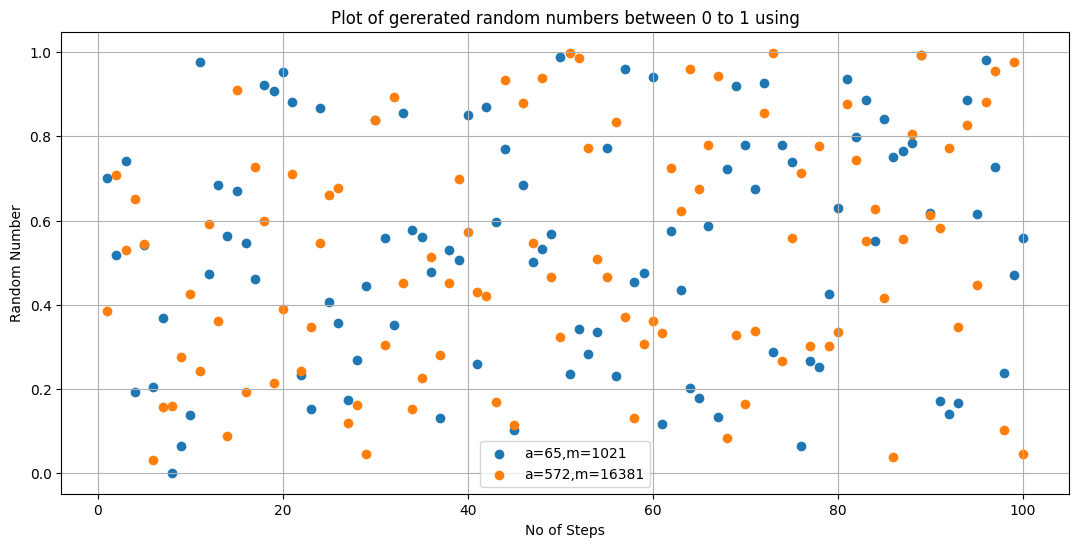

In [59]:
rng_1 = lib.rng(seed=11,a=65,m=1021,c=0)
rng_2 = lib.rng(seed=11,a=572,m=16381,c=0)

xlist = [i for i in range(1,101)]
ylist_1 = [rng_1.gen() for i in range(1,101)]
ylist_2 = [rng_2.gen() for i in range(1,101)]

plt.figure(figsize=(13,6))
plt.scatter(xlist,ylist_1,label='a=65,m=1021')
plt.scatter(xlist,ylist_2,label='a=572,m=16381')
plt.xlabel('No of Steps')
plt.ylabel('Random Number')
plt.title('Plot of gererated random numbers between 0 to 1 using LCG')
plt.legend()
plt.grid()
plt.show()

<hr>

### Q2

In [60]:
def f(x):
    return np.cos(x)


x_min = -np.pi/2
x_max = np.pi/2

I = lib.monte_carlo_integrate(f,x_min,x_max,10000,17,multiplier=572,m=16381,c=0)
print("The value of integral is ",I, "using 10000 points")    

The value of integral is  2.0065394710490914 using 10000 points


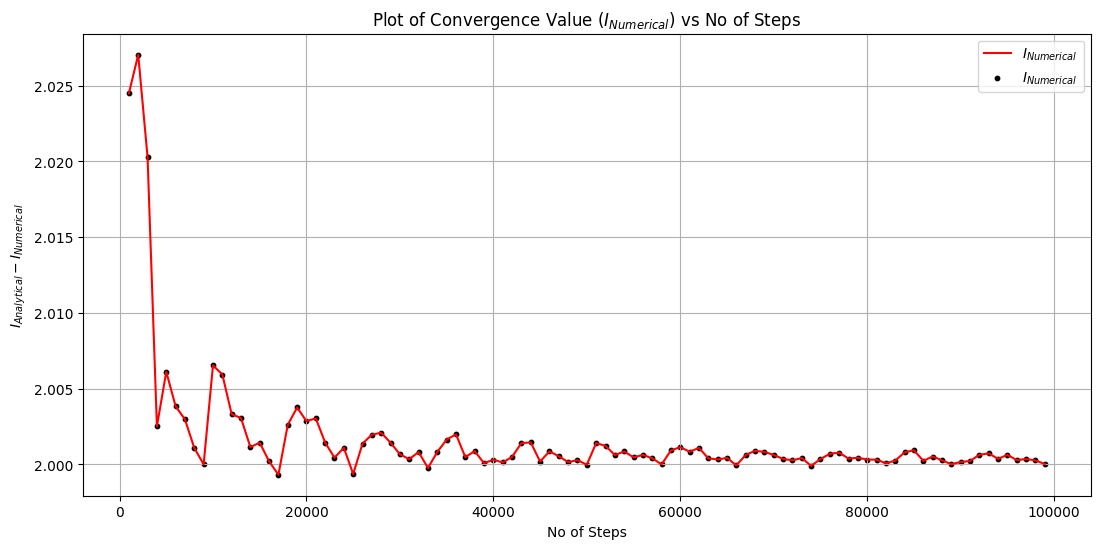

In [61]:
xlist = []
ylist = []

plt.figure(figsize=(13,6))
for i in range(1000,100000,1000):
    xlist.append(i)
    ylist.append(abs(lib.monte_carlo_integrate(f,x_min,x_max,i,17,multiplier=572,m=16381,c=0)))

plt.plot(xlist,ylist,label=r'$I_{Numerical}$',color='red')
plt.scatter(xlist,ylist,label=r'$I_{Numerical}$',color='black',s=10)
plt.xlabel('No of Steps')
plt.ylabel(r'$I_{Analytical} - I_{Numerical}$')
plt.title(r'Plot of Convergence Value ($I_{Numerical}$) vs No of Steps')
plt.legend()
plt.grid()
plt.show()

<hr>

### Q3

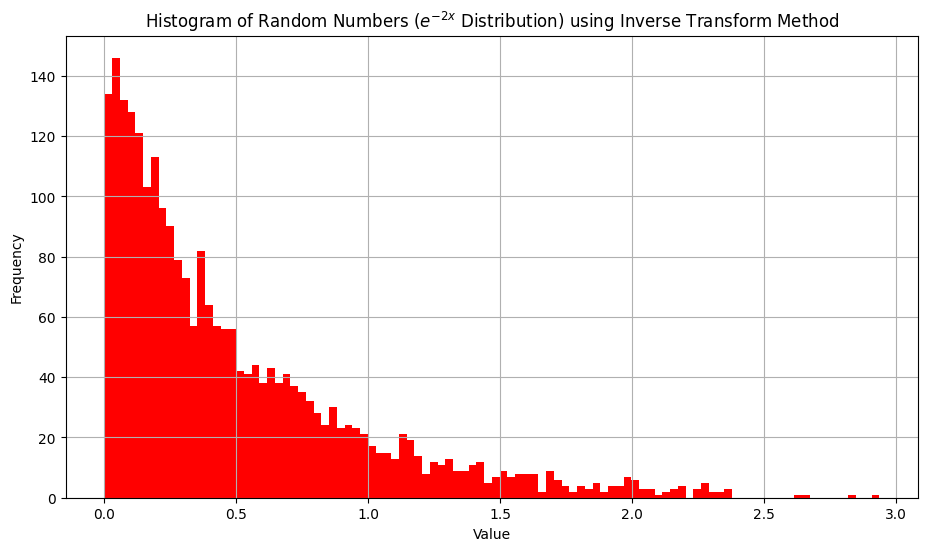

In [62]:
def f(x):
    return np.exp(-2*x)

def f_inv(x):
    return -0.5*np.log(abs(1-(2*x/3)))

rng = lib.rng(seed = 17)

rng_list = []
for i in range(2500):
    p= 3*rng.gen()
    if f_inv(p)<3:
        rng_list.append(f_inv(p))

import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
plt.hist(rng_list, bins=100,color='red')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(r'Histogram of Random Numbers ($e^{-2x}$ Distribution) using Inverse Transform Method')
plt.grid()
plt.show()

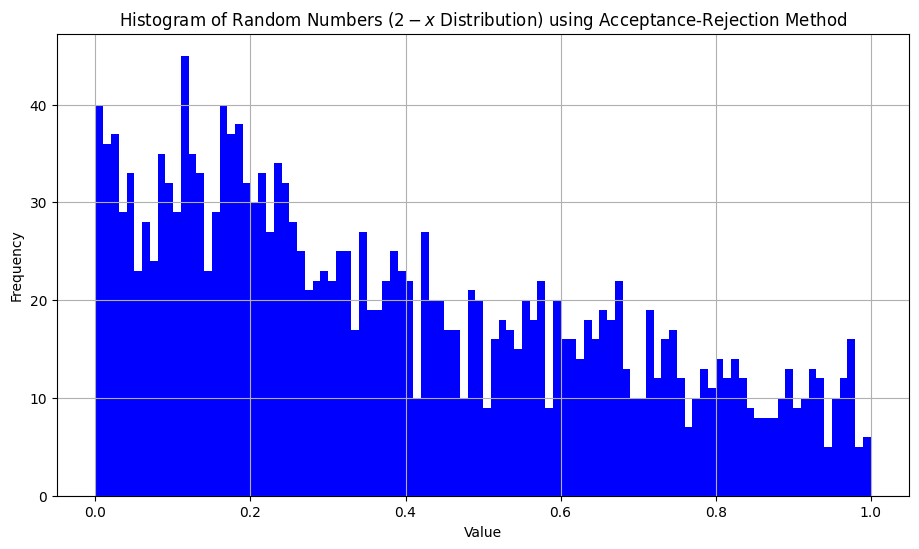

In [63]:
rng_1 = lib.rng(seed=19) # for x
rng_2 = lib.rng(seed=13) # for u

rng_list = []

def f(x):
    return np.exp(-2*x)

def g(x):
    return 2-x


while True:
    x= rng_1.gen()
    u= rng_2.gen()
    test = f(x)/((0.5)*g(x))
    if u<=test:
        rng_list.append(x)
    if len(rng_list)==2000:
        break
    
        
import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
plt.hist(rng_list, bins=100,color='b')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(r'Histogram of Random Numbers ($2-x$ Distribution) using Acceptance-Rejection Method')
plt.grid()
plt.show()


<hr>

### Q4

In [64]:
def f(x):
    return np.exp(-2*x)/(1+x**2)

Integral = lib.monte_carlo_integrate(f,0,2,10000,19)
print("The value of integral is ",np.round(Integral,6), "using p_1 points")

The value of integral is  0.398935 using p_1 points


In [65]:
def f(x):
    return np.exp(-2*x)/(1+x**2)

x_min = 0
x_max = 2

N = 10000
uni_rng = lib.rng(seed = 19)
sum = 0
for i in range(N):
    x = uni_rng.gen()
    x=-np.log(abs(1-x))
    transform = ((x_max-x_min)*(x))+x_min
    sum+=(x_max - x_min)*f(transform)/N

integral_p2 = sum
print("The value of integral is ",np.round(integral_p2,6), r"using p_2(x)")

The value of integral is  0.33938 using p_2(x)


In [66]:
def f(x):
    return np.exp(-2*x)/(1+x**2)

x_min = 0
x_max = 2

N = 10000
uni_rng = lib.rng(seed = 19)
sum = 0
for i in range(N):
    x = uni_rng.gen()
    x=-2*np.log(abs((1-np.exp(-0.5))*x - 1))
    transform = ((x_max-x_min)*(x))+x_min
    sum+=(x_max - x_min)*f(transform)/N

integral_p2 = sum
print("The value of integral is ",np.round(integral_p2,6), r"using p_3(x)")

The value of integral is  0.464736 using p_3(x)
